### Data Visualization

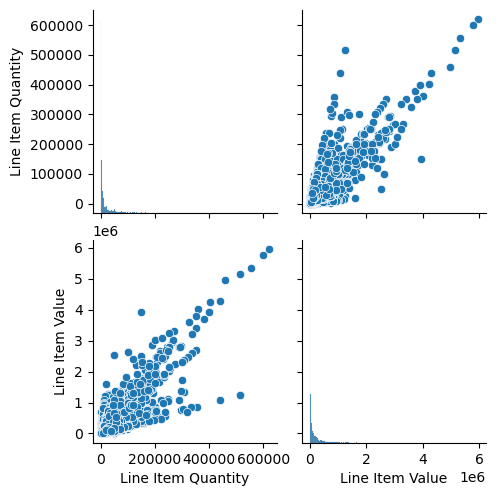

In [14]:
#pairplot of weight, freight, line item quantity and line item value:
weight_freight=['Freight Cost (USD)', 'Weight (Kilograms)','Line Item Quantity','Line Item Value']
sns.pairplot(df[weight_freight])
plt.show()

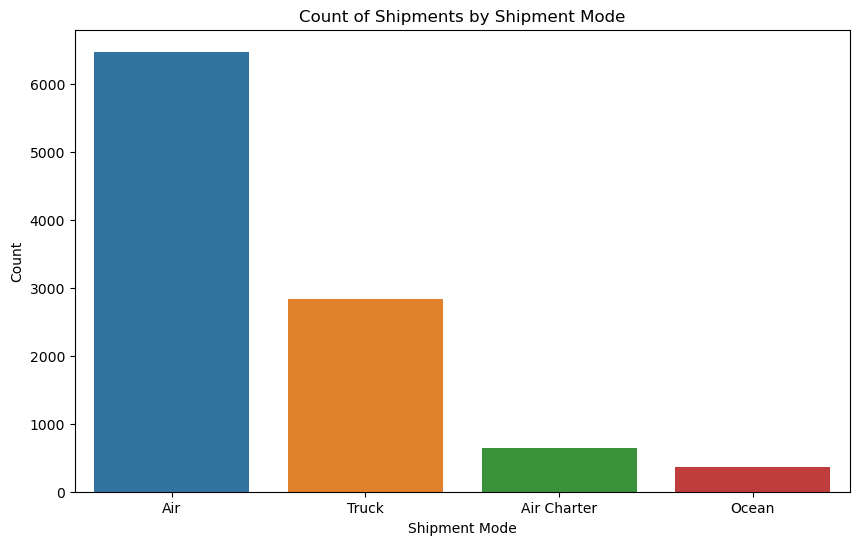

In [15]:
#Shipment Mode-Count Plot:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Shipment Mode')
plt.title("Count of Shipments by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Count")
plt.show()

The highest number of shipments approximately 200 and more were conducted by air. This indicates that air transport is the most commonly used mode of shipping in your dataset.

Truck shipments, while fewer in number compared to air, still represent a significant portion of the total shipments, with around 80 recorded in your dataset.

Air charter shipments are still noteworthy with around 60 shipments. These are used for specific logistics requirements.

Ocean shipments have the fewest records implying that this mode of transportation is the least commonly used among the options. 

In [16]:
df['Country'].unique()

array(["Côte d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)

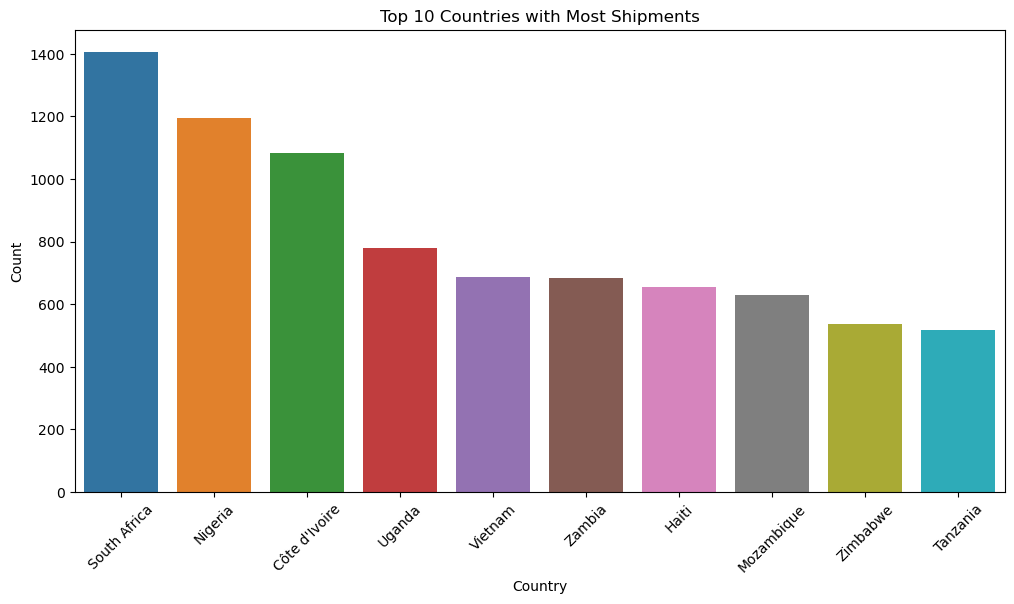

In [17]:
df['Country_Str'] = df['Country'].astype(str)
top_countries=df['Country_Str'].value_counts().nlargest(10)
top_countries=top_countries.sort_values(ascending=False)  

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries with Most Shipments")
plt.xlabel('Country')
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

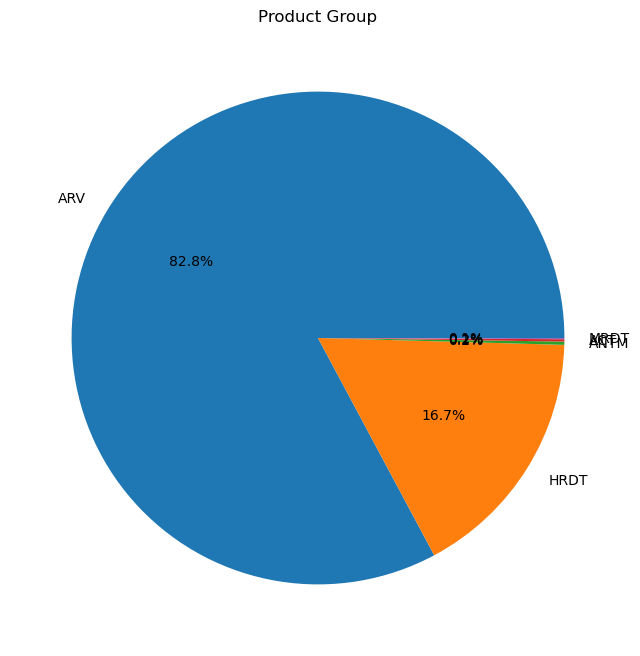

In [18]:
product_group=df['Product Group'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(product_group,labels=product_group.index,autopct='%1.1f%%')
plt.title("Product Group")
plt.show()

In [19]:
df['Product Group'].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

The pie chart provides a quick visual overview of the distribution of product groups in your dataset. 
ARV(Antiretroviral) that has 8550 counts and over 82% is the largest slice of the pie and HRDT are the most prevalent, while the other product groups have significantly fewer counts. 

In [20]:
#Line Item value by Countries:

Country_Str
Nigeria          3.502721e+08
Zambia           2.469888e+08
Mozambique       1.820247e+08
Tanzania         1.294595e+08
Côte d'Ivoire    1.208845e+08
Name: Line Item Value, dtype: float64


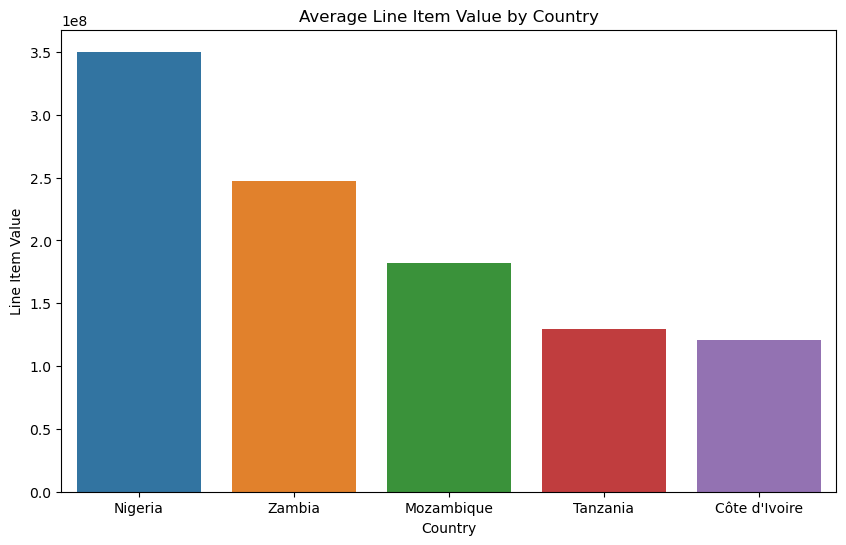

In [21]:
country_sums=df.groupby('Country_Str')['Line Item Value'].sum()
top_countries=country_sums.nlargest(5)
print(top_countries)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.title("Average Line Item Value by Country")
plt.xlabel("Country")
plt.ylabel("Line Item Value")
plt.show()

The graph displays the average 'Line Item Value' for the top 5 countries in the dataset. Namibia stands out with the highest average 'Line Item Value' of approximately $643,807.83 USD, indicating that transactions involving Namibia tend to have the greatest monetary significance. 

Nigeria follows closely with an average of about $446,731.94 USD, showing substantial transaction values as well. 

Pakistan, Tanzania, and South Africa also feature in the top 5, with average values of approximately $358,720.00 USD, $252,114.09 USD, and $188,759.56 USD, respectively. These findings offer valuable insights into the varying transaction values across these countries, aiding in strategic decision-making and resource allocation within a business context.

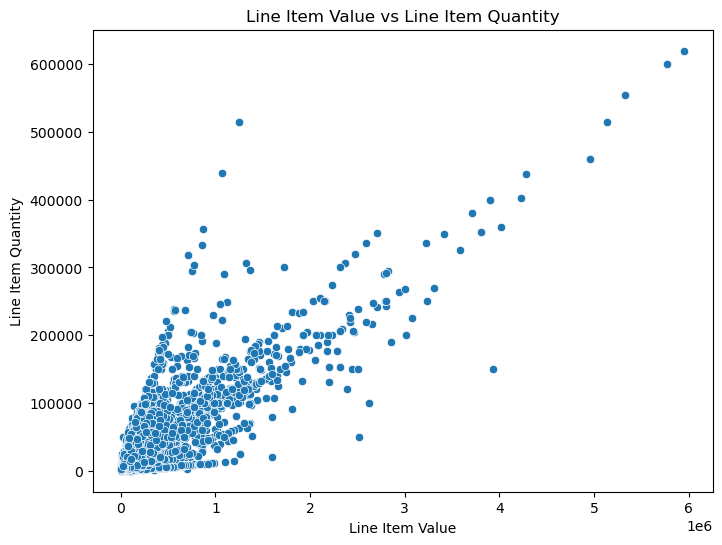

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Line Item Value',y='Line Item Quantity',data=df)
plt.title("Line Item Value vs Line Item Quantity")
plt.xlabel("Line Item Value")
plt.ylabel("Line Item Quantity")
plt.show()

The scatterplot reveals that the majority of shipments consist of low-value, low-quantity items. However, there are also shipments with higher values and quantities, indicating some variability in the types of products and shipments included in our data.

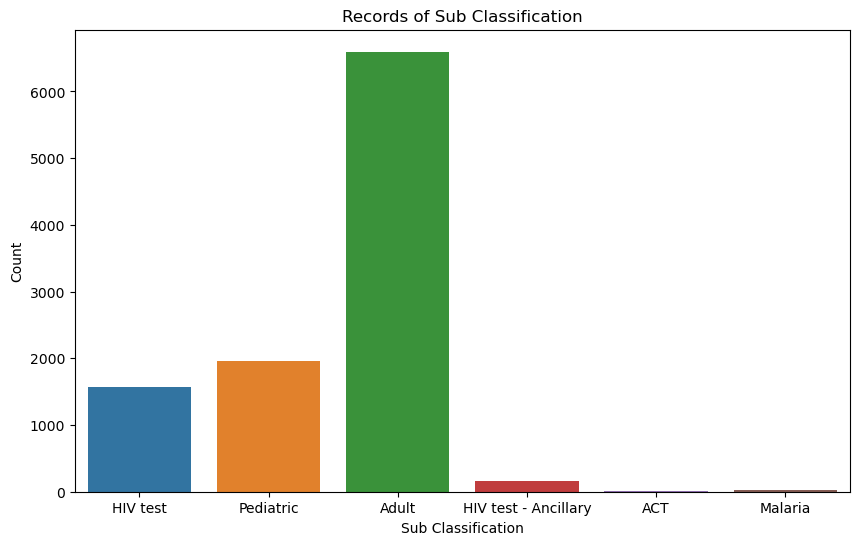

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sub Classification',data=df)
plt.title("Records of Sub Classification")
plt.xlabel("Sub Classification")
plt.ylabel("Count")
plt.show()

In [24]:
df['Sub Classification'].value_counts().sort_values(ascending=False)

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

The majority of products fall into the "Adult" and "Pediatric" categories, indicating a focus on medical supplies for both adult and pediatric patients, while "HIV test" and "HIV test - Ancillary" are also prevalent categories, suggesting a significant presence of HIV-related diagnostic products. Other categories like "Malaria" and "ACT" represent a smaller proportion of the dataset, likely indicating less common medical products or specific niche offerings.

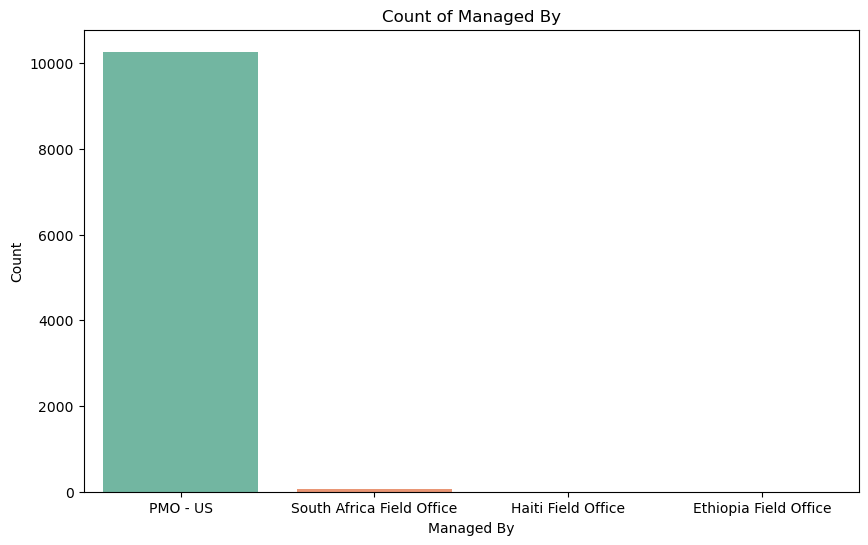

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Managed By', data=df, palette='Set2')
plt.title('Count of Managed By')
plt.xlabel('Managed By')
plt.ylabel('Count')
plt.show()

In [26]:
df['Managed By'].value_counts()

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: Managed By, dtype: int64

"PMO - US" dominates with a substantial count of 10,265 shipments, signifying that this office plays a central role in managing a large portion of the shipments. 

In contrast, "South Africa Field Office," "Ethiopia Field Office," and "Haiti Field Office" have significantly fewer shipments, indicating that they might oversee specific regional operations or projects with much lower shipment volumes compared to the central "PMO - US" office.

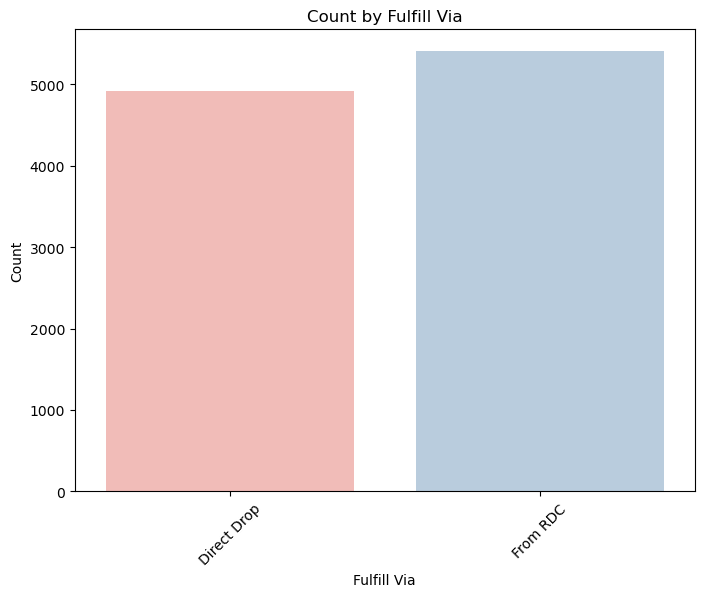

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fulfill Via', data=df, palette='Pastel1')
plt.title('Count by Fulfill Via')
plt.xlabel('Fulfill Via')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

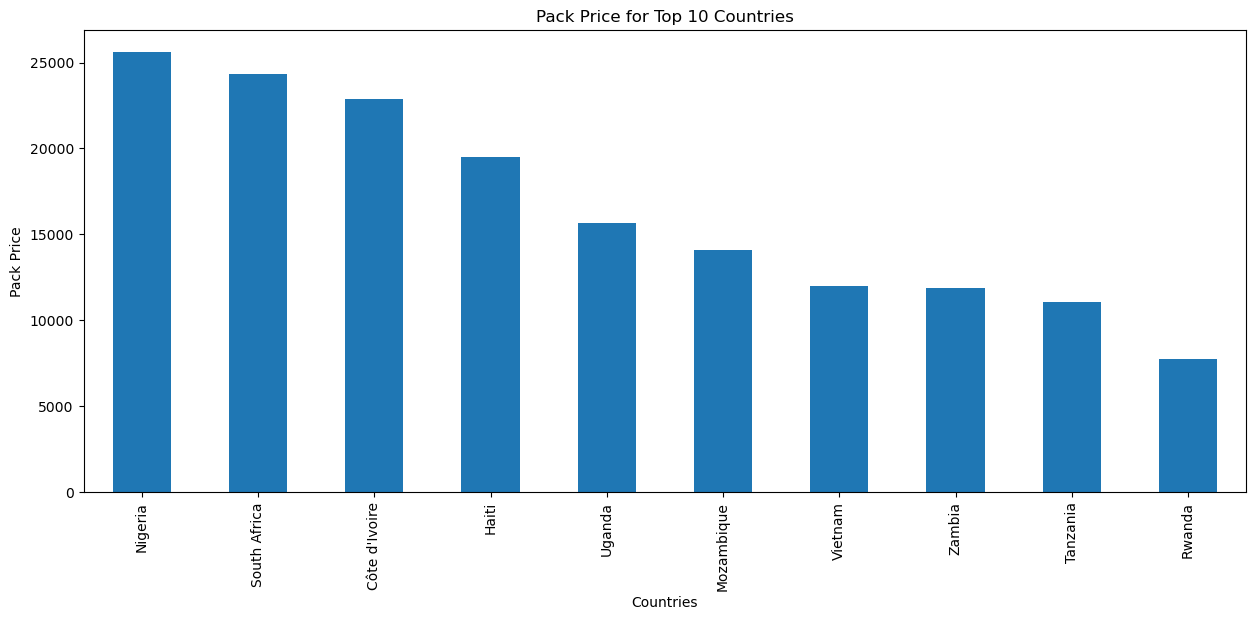

In [28]:
# Country with Pack Price
country_pricepack=df.groupby(['Country'])['Pack Price'].sum().nlargest(10)
plt.figure(figsize=(15,6))
country_pricepack.plot(kind='bar')
plt.title("Pack Price for Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Pack Price")
plt.show()

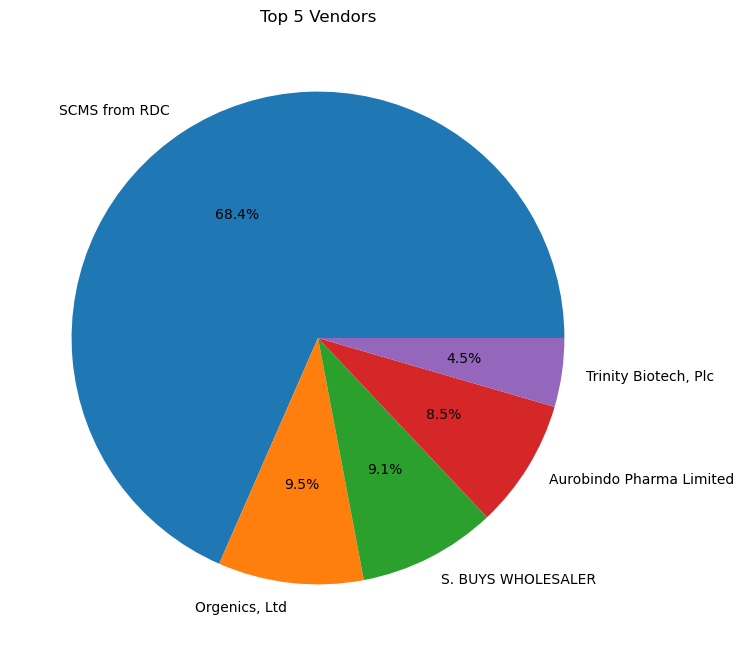

In [29]:
top_vendors=df['Vendor'].value_counts().nlargest(5)
plt.figure(figsize=(8,8))
plt.pie(top_vendors,labels=top_vendors.index,autopct='%1.1f%%')
plt.title("Top 5 Vendors")
plt.show()

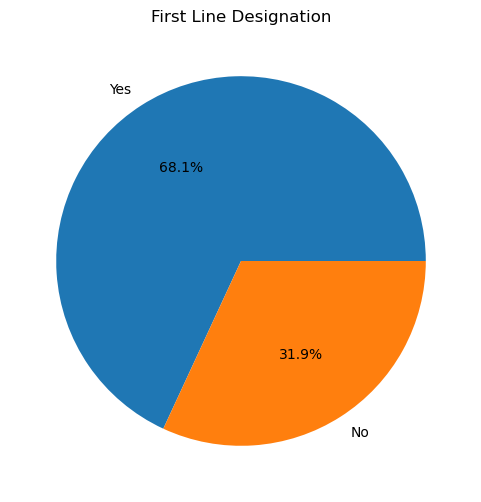

In [30]:
first_line=df['First Line Designation'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(first_line,labels=first_line.index,autopct='%1.1f%%')
plt.title("First Line Designation")
plt.show()

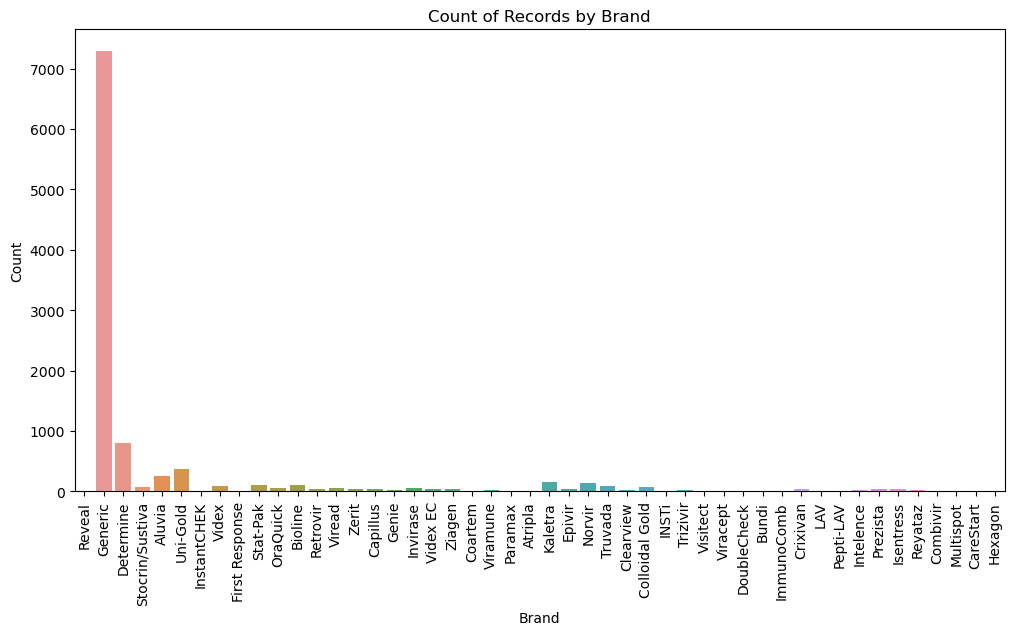

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=df)
plt.title('Count of Records by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [32]:
print("The Number of Times 'Generic' brand occured in dataset is: ",df['Brand'].value_counts().get('Generic',0))

The Number of Times 'Generic' brand occured in dataset is:  7285


As we can observe above, the highest number of times 'Generic' brand has occured which is 7285 times. Now we will dive into into the 'Brand' column with 'Unit Price' and get insights by summing the units price for each brand

Top Brands by Total Units Price:
Brand
Colloidal Gold    1686.00
Generic           1287.32
Determine          791.67
Uni-Gold           653.95
OraQuick           317.89
Pepti-LAV          238.65
Stat-Pak           157.78
Multispot          126.46
LAV                 93.04
Truvada             90.55
Name: Unit Price, dtype: float64


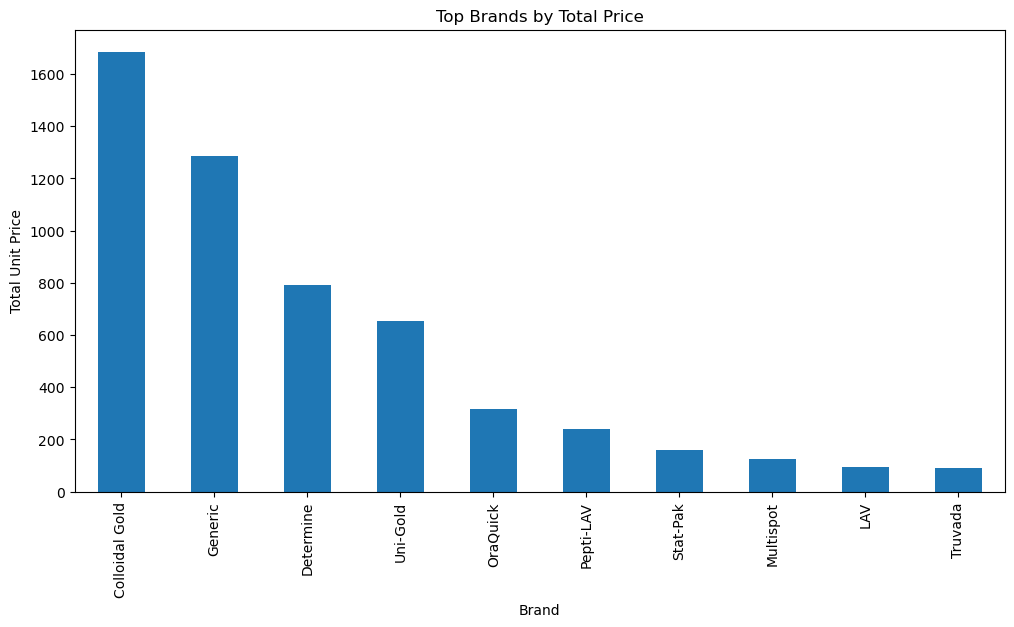

In [33]:
brands_units_sum=df.groupby("Brand")['Unit Price'].sum().sort_values(ascending=False)

print("Top Brands by Total Units Price:")
print(brands_units_sum.head(10))

plt.figure(figsize=(12,6))
brands_units_sum.head(10).plot(kind='bar')
plt.title("Top Brands by Total Price")
plt.xlabel("Brand")
plt.ylabel('Total Unit Price')
plt.show()

Top Brands by Total Units Quantity:
Brand
Colloidal Gold    1686.00
Generic           1287.32
Determine          791.67
Uni-Gold           653.95
OraQuick           317.89
Pepti-LAV          238.65
Stat-Pak           157.78
Multispot          126.46
LAV                 93.04
Truvada             90.55
Name: Unit Price, dtype: float64


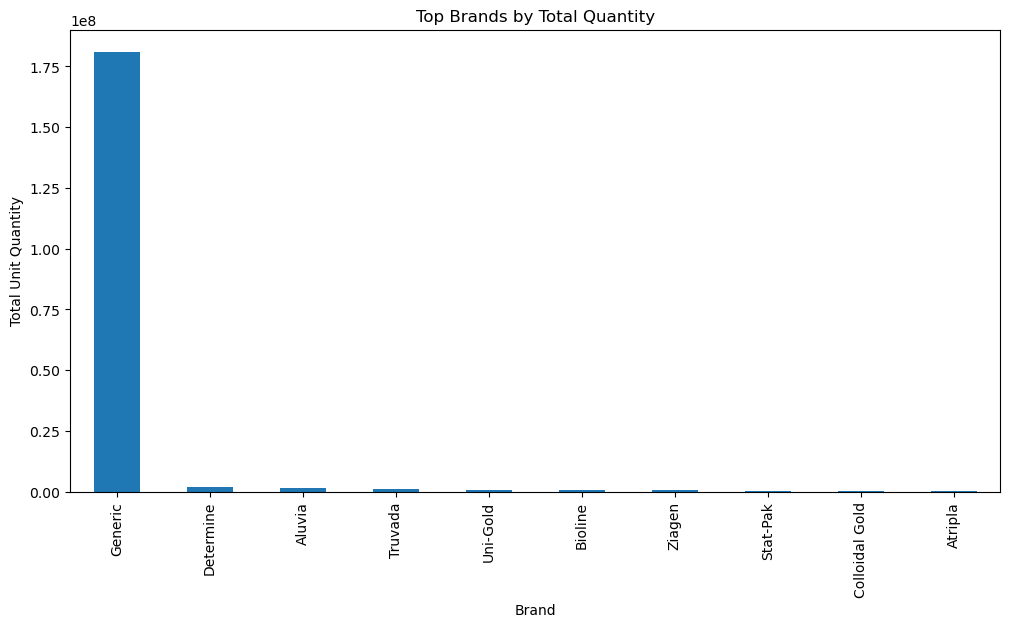

In [34]:
brands_units=df.groupby("Brand")['Line Item Quantity'].sum().sort_values(ascending=False)

print("Top Brands by Total Units Quantity:")
print(brands_units_sum.head(10))

plt.figure(figsize=(12,6))
brands_units.head(10).plot(kind='bar')
plt.title("Top Brands by Total Quantity")
plt.xlabel("Brand")
plt.ylabel('Total Unit Quantity')
plt.show()

These insights suggest that each brand has its unique strategy and market position.

1. Colloidal Gold brand has the highest total unit price shipped, indicating that its products are relatively expensive. However, it has a lower count, suggesting that it focuses on selling fewer units at a higher price point.

2. Generic has the highest count of sales, it ranks second in total unit price shipped. This indicates that Generic is catering to a larger customer base with a lower-priced product. The high count suggests that it's in a growth phase, possibly appealing to customers who prefer smaller, more affordable quantities.

3. Determines is another brand with a growing presence. It has a good balance between unit price and count. Although its unit price is lower than Colloidal Gold, its count-to-unit price ratio is higher, implying that it's achieving a solid balance between selling a reasonable quantity of units at a competitive price.

Manufacturing Sites:
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
Name: Manufacturing Site, dtype: int64


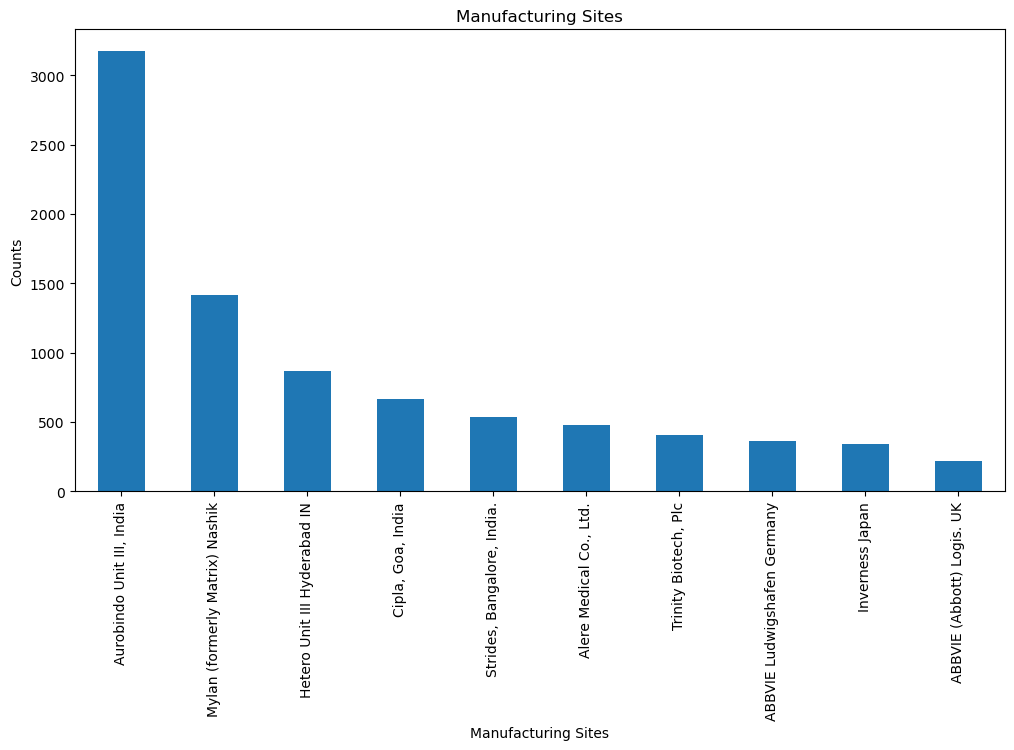

In [35]:
manufacturing_site=df["Manufacturing Site"].value_counts()
print("Manufacturing Sites:")
print(manufacturing_site.head(10))

plt.figure(figsize=(12,6))
manufacturing_site.head(10).plot(kind='bar')
plt.title("Manufacturing Sites")
plt.xlabel("Manufacturing Sites")
plt.ylabel('Counts')
plt.show()

The list above represents the top manufacturing sites with the highest quantities of products shipped. Aurobindo Unit III in India leads with 3172 shipments, followed by Mylan (formerly Matrix) Nashik with 1415 shipments, indicating the prominence of these manufacturing facilities in the distribution of products.